In [ ]:
## Import necessary libraries

import numpy as np  # For numerical operations and array manipulation
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as ppl  # For data visualization and plotting
import sklearn as skl  # For machine learning algorithms and tools
from statsmodels.tsa.seasonal import seasonal_decompose  # For decomposing time series into trend, seasonal, and residual components
from pandas.plotting import autocorrelation_plot  # For plotting autocorrelation of time series data
from statsmodels.tsa.arima.model import ARIMA  # For ARIMA time series forecasting models
from statsmodels.tsa.stattools import adfuller  # For Augmented Dickey-Fuller test to check stationarity
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  # For plotting autocorrelation and partial autocorrelation functions

In [2]:
## Import data

amazon = pd.read_csv('./Datasets/Amazon Stocks/Amazon_stock_data.csv')

In [3]:
amazon = pd.DataFrame(amazon.tail(1825))

In [ ]:
# Extract date and log return data from the Amazon dataframe
amzDates = amazon['Date']
amzPrice = np.log(1 + amazon.Close.pct_change())

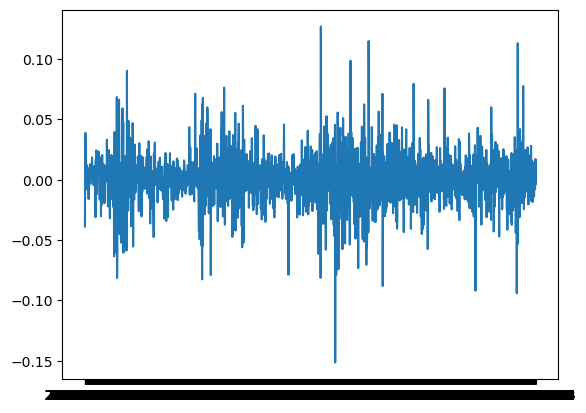

In [9]:
# Plot Amazon stock prices over time
ppl.plot(amzDates, amzPrice)
# Display the plot
ppl.show()

In [ ]:
# Assign the previously calculated returns (amzPrice) to a new column called 'Log_Ret'
amazon['Log_Ret'] = amzPrice

# Remove the first row of the dataframe since it has NaN for Log_Ret
# (log returns can't be calculated for the first data point)
amazon.drop(index=amazon.index[0], inplace=True)


,Date,Close,High,Low,Open,Volume,Log_Ret
5269,2018-04-24,73.004501,76.974998,72.422501,76.790001,149894000,-0.038803
5270,2018-04-25,73.008499,73.499496,70.750999,72.900002,131746000,0.000055
5271,2018-04-26,75.898003,76.471001,73.925003,74.250504,176022000,0.038815
5272,2018-04-27,78.630997,81.904999,78.369499,81.700500,261064000,0.035376
5273,2018-04-30,78.306503,79.800003,78.046997,79.125000,109282000,-0.004135


In [12]:
# Extract Date and Log_Ret columns from the amazon dataframe
amz_df = amazon[['Date', 'Log_Ret']]

# Perform time series decomposition on Amazon stock prices
# This breaks the time series into trend, seasonal, and residual components using an additive model
amzDecomposition = seasonal_decompose(amz_df['Log_Ret'], model='additive', period=365)

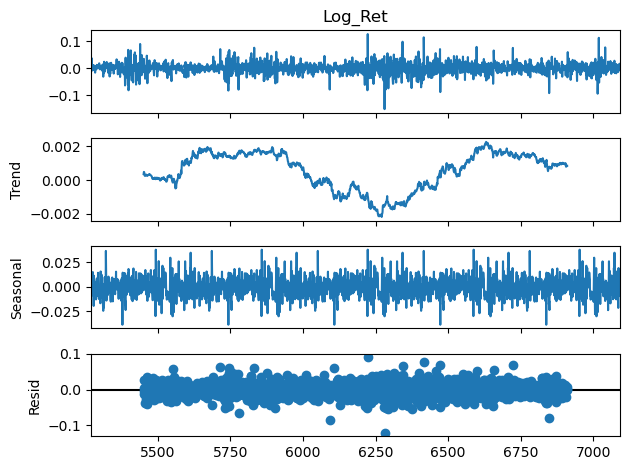

In [13]:
# Plot the decomposition components of the Amazon time series
amzDecomposition.plot()
# Display the plot
ppl.show()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

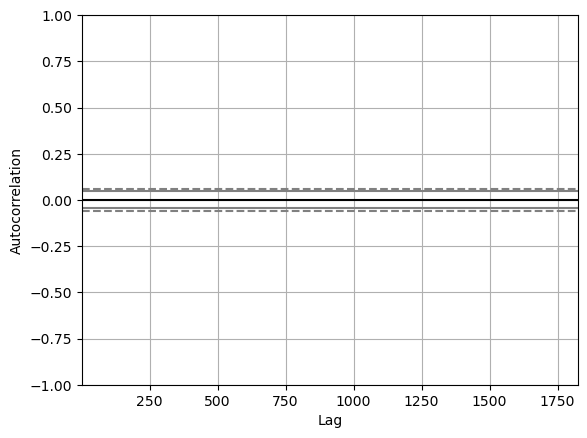

In [14]:
# Create an autocorrelation plot for the Amazon price data
# This helps visualize how the price values are correlated with their own lagged values
# Useful for identifying patterns, seasonality, or random behavior in time series data
autocorrelation_plot(amzPrice)

In [16]:
# Set the 'Date' column as the index of the amazon DataFrame
# This transforms the DataFrame to use dates as row labels instead of numeric indices
ind_amazon = amazon.set_index(['Date'])
ind_amazon = ind_amazon['Log_Ret']

In [ ]:
# Calculate the rolling mean with a 365-day window for the Amazon index
rolling_mean = ind_amazon.rolling(window = 365).mean()
# Calculate the rolling standard deviation with a 365-day window for the Amazon index
rolling_sd = ind_amazon.rolling(window = 365).std()

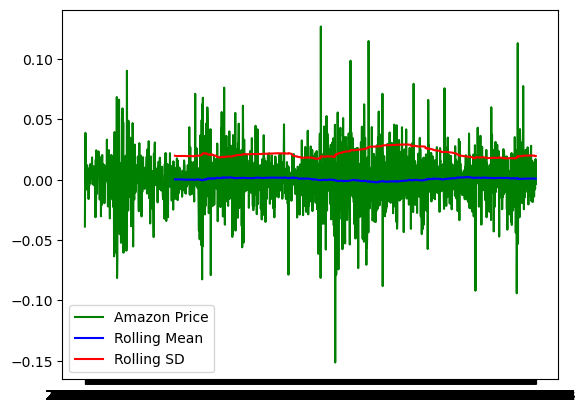

In [19]:
# Plot Amazon stock price in green
ppl.plot(ind_amazon, color = 'green', label = 'Amazon Price')
# Plot the rolling mean in blue
ppl.plot(rolling_mean, color = 'blue', label = 'Rolling Mean')
# Plot the rolling standard deviation in red
ppl.plot(rolling_sd, color = 'red', label = 'Rolling SD')
# Add a legend to the plot with optimal positioning
ppl.legend(loc='best')
# Display the plot without blocking execution of subsequent cells
ppl.show()

In [20]:
# Perform Augmented Dickey-Fuller test on the 'ind_amazon' time series
# This tests for stationarity with automatic lag selection using Akaike Information Criterion (AIC)
# Returns test statistics and p-values to determine if the series has a unit root
# H0: The time series is non-stationary. In other words, it has some time-dependent structure and does not 
# have constant variance over time.
df_test = adfuller(ind_amazon, autolag='AIC')

In [21]:
# Display the test dataframe to examine its structure and contents: test_statistics, 
# p-value,#lag-used, #of_records_used, critical values(%)
# Returns are Stationary
print(df_test) 

(np.float64(-44.283682810938366), 0.0, 0, 1823, {'1%': np.float64(-3.4339421732313236), '5%': np.float64(-2.8631267441543695), '10%': np.float64(-2.5676147289449824)}, np.float64(-8639.769422475647))


In [ ]:
amzP = ind_amazon

In [23]:
# Perform Augmented Dickey-Fuller test on the 'ind_amazon' time series
# This tests for stationarity with automatic lag selection using Akaike Information Criterion (AIC)
# Returns test statistics and p-values to determine if the series has a unit root
# H0: The time series is non-stationary. In other words, it has some time-dependent structure and does not 
# have constant variance over time.
df_test_amzP = adfuller(amzP, autolag='AIC')

In [24]:
# Display the test dataframe to examine its structure and contents: test_statistics, 
# p-value,#lag-used, #of_records_used, critical values(%)
# Returns are Stationary
print(df_test_amzP) 

(np.float64(-44.283682810938366), 0.0, 0, 1823, {'1%': np.float64(-3.4339421732313236), '5%': np.float64(-2.8631267441543695), '10%': np.float64(-2.5676147289449824)}, np.float64(-8639.769422475647))


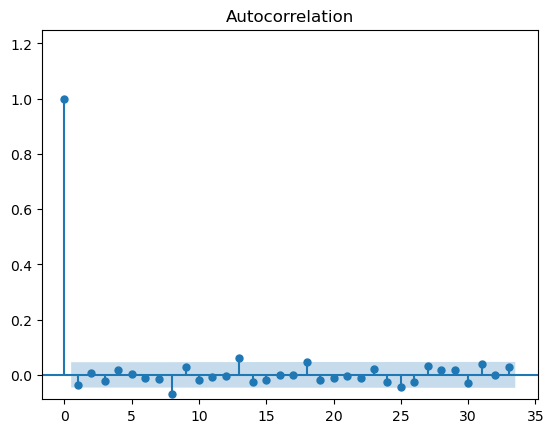

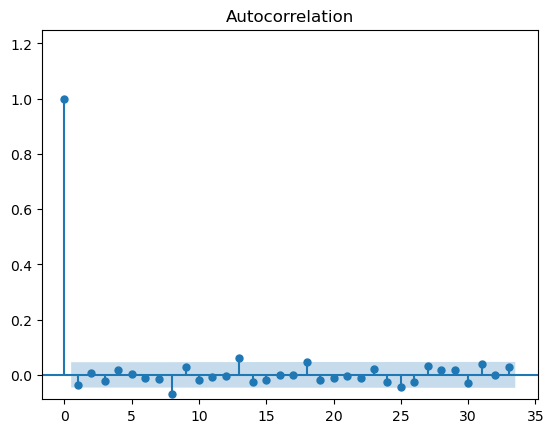

In [27]:
# Plot the autocorrelation function (ACF) for the Amazon price time series
# This helps visualize how the price values are correlated with their own lagged values
# Useful for identifying patterns, seasonality, and determining if a time series is stationary
plot_acf(amzP, auto_ylims=True)

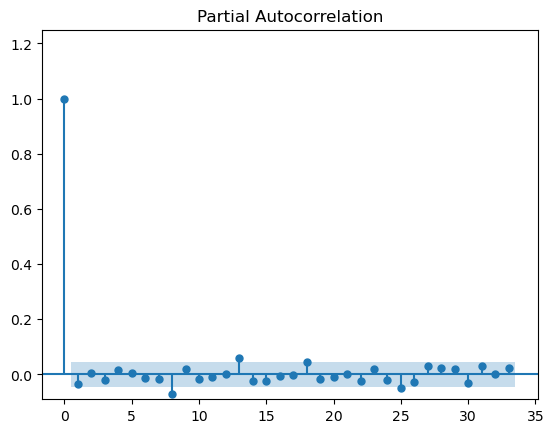

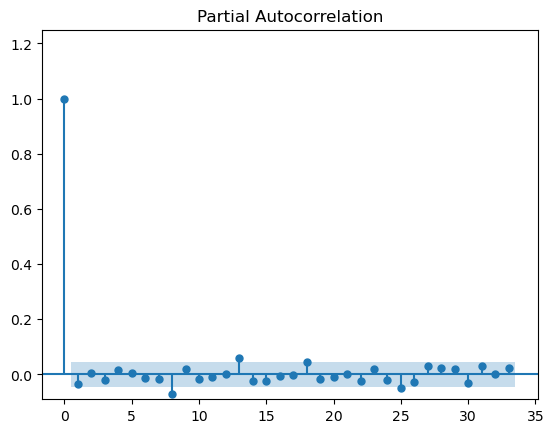

In [30]:
# Plot the Partial Autocorrelation Function (PACF) for the Amazon price data
# PACF helps identify direct relationships between observations at different lags
# This is useful for determining the order of an AR model in time series analysis
plot_pacf(amzP, auto_ylims=True)

In [32]:
# Calculate the residuals (the difference between the observed values and the fitted values)
# from the time series decomposition model stored in 'amzDecomposition'
residuals = amzDecomposition.resid

In [ ]:
# Get descriptive statistics of the residuals DataFrame
residuals.describe()

# Replace any NaN values in the residuals DataFrame with 0
residuals[np.isnan(residuals)] = 0

5269    0.0
5270    0.0
5271    0.0
5272    0.0
5273    0.0
Name: resid, dtype: float64

In [35]:
# Perform Augmented Dickey-Fuller test on residuals to check for stationarity
# autolag='AIC' automatically selects the optimal lag length using Akaike Information Criterion
df_test_residuals = adfuller(residuals, autolag='AIC')

In [36]:
print(df_test_residuals)

(np.float64(-11.404726458793991), np.float64(7.498030145370815e-21), 14, 1809, {'1%': np.float64(-3.4339700129534423), '5%': np.float64(-2.8631390341376393), '10%': np.float64(-2.567621272963846)}, np.float64(-9609.855281801116))


In [42]:
# Split the Amazon price data into training and testing sets
# First 6000 rows for training, remaining rows for testing
# Assuming amzPriceTrain is a pandas Series or DataFrame with a DatetimeIndex
# Set the frequency of the index explicitly
amzPr = amzP
amzPr.index = pd.to_datetime(amzPr.index)

In [ ]:
# Set the frequency explicitly
# First, sort the index to ensure it's in chronological order
amzPr = amzPr.sort_index()

# Try to infer the frequency first
inferred_freq = pd.infer_freq(amzPr.index)

if inferred_freq:
    # If a frequency can be inferred, use it
    amzPr.index = pd.DatetimeIndex(amzPr.index, freq=inferred_freq)
else:
    # If no frequency can be inferred, set it explicitly based on your data
    # For daily data:
    amzPr = amzPr.asfreq('D', method='pad')  # 'pad' will forward-fill any missing values
    # Or for business days:
    # amzPr = amzPr.asfreq('B', method='pad')



Before: Index frequency: None
Inferred frequency: None
After: Index frequency: <Day>


In [80]:
amzPriceTrain, amzPriceTest = amzPr.head(1700), amzPr.tail(len(amzPr)-1700)

In [56]:
# Create a ARIMA model for Amazon stock price time series
# Parameters:
# - amzPriceTrain: training data for Amazon stock prices
# - seasonal_order=(1, 1, 1): specifies SARIMA components
#   - Seasonal AR order = 1
#   - Seasonal differencing = 1
#   - Seasonal MA order = 1
#   - Seasonal period = 365 days (annual seasonality)
amz_model = ARIMA(amzPriceTrain, order = (1,1,1))

In [57]:
my_model = amz_model.fit()

In [64]:
print(my_model.summary())

                               SARIMAX Results                                
Dep. Variable:                Log_Ret   No. Observations:                 1700
Model:                 ARIMA(1, 1, 1)   Log Likelihood                4059.138
Date:                Fri, 29 Aug 2025   AIC                          -8112.275
Time:                        08:03:43   BIC                          -8095.962
Sample:                    04-24-2018   HQIC                         -8106.236
                         - 12-18-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3462      0.012     29.296      0.000       0.323       0.369
ma.L1         -1.0000      0.122     -8.165      0.000      -1.240      -0.760
sigma2         0.0005   5.98e-05      8.202      0.0

In [75]:
forecast = my_model.predict(1700, len(amzPr)-1).rename("predictions")

<Axes: xlabel='Date'>

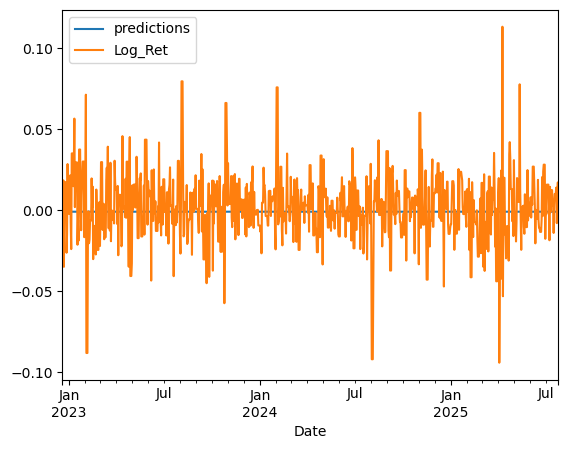

In [81]:
forecast.plot(legend=True)
amzPriceTest.plot(legend=True)